# DS-NYC-45 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [3]:
len(df.index)

400

Answer: 400

> ### Question 2.  Create a summary table.

In [4]:
df.describe()

/Users/yunchoi/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [5]:
df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

Answer: The range of possible values for `gre` is bigger than range of possible values for `gpa`. (200-800 vs 0-4)

> ### Question 4.  Drop data points with missing data.

In [6]:
df.dropna(inplace=True)

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [7]:
print(len(df.index))
df.describe()

397


,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: 397 observations remain in the dataset. Each column has a count of 397. (and NaN values are not counted)

> ### Question 6.  Create boxplots for `gre` and `gpa`.

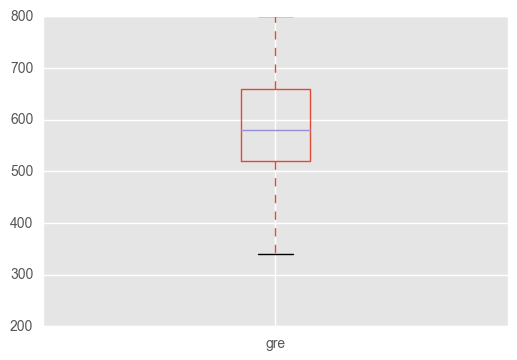

In [8]:
df.boxplot(column='gre',return_type='dict');

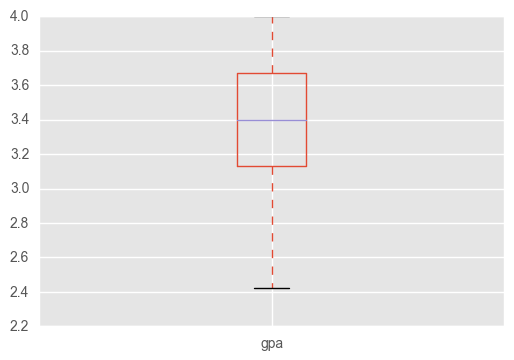

In [9]:
df.boxplot(column='gpa',return_type='dict');

> ### Question 7.  What do boxplots show?

Answer: Box shows quartiles(25th and 75th percentiles for box edges and 50th percentile for purple line in the box.) The end lines ("whiskers") are the non-outlier range of the distribution.

> ### Question 8.  Plot the distribution of each variable.

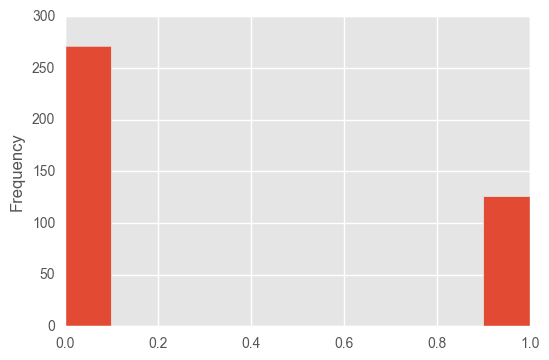

In [10]:
df['admit'].plot.hist();

In [11]:
gre_mean, gre_std = df['gre'].mean(), df['gre'].std()
x = range(200,800)
from scipy.stats import norm

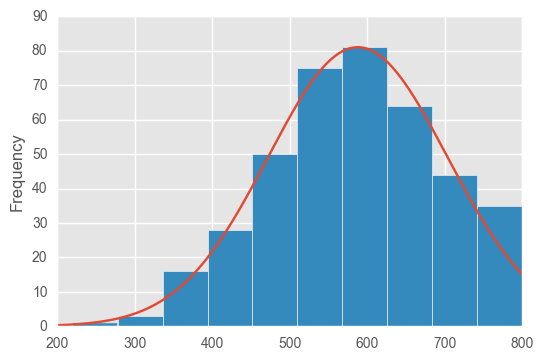

In [13]:
plt.plot(x, norm.pdf(x,gre_mean,gre_std)*23500)
df['gre'].plot.hist();

In [18]:
gpa_std

0.38020829214908614

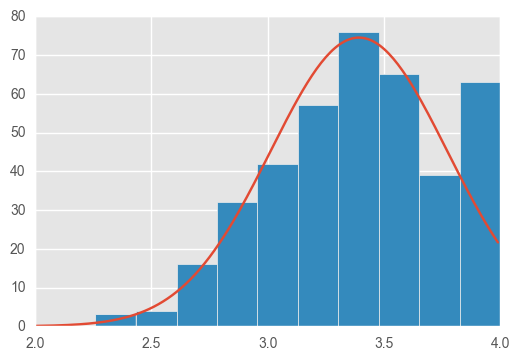

In [23]:
import numpy as np

gpa_mean, gpa_std = df['gpa'].mean(), df['gpa'].std()
y = np.arange(2,4,0.01)
plt.plot(y, norm.pdf(y,gpa_mean,gpa_std)*71)
df['gpa'].hist();

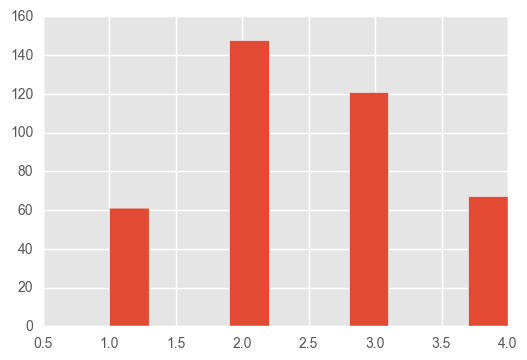

In [15]:
df['prestige'].hist();

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

Answer: (See fitted normal distribution plots above.) The distributions are approximately normal with the right tail cut off at the maximum values (800 for GRE score and 4.0 for GPA). To correct for it, assign the maximum value (800 or 4.0) for any values from the normal distribution above the maximum.

> ### Question 10.  Create a correlation matrix for the dataset

In [7]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: Both `gre` and `gpa` are positively correlated with the outcome variable `admit`, while `prestige` is negatively correlated with `admit`, as expected. Among predictor variables, `gre` and `gpa` had the largest correlation of `0.38`, but not large enough to be considered potentially colinear.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer:
Exploratory Analysis Plan:
<li> Use describe function to get key statistics (mean, standard deviation).
<li> Use historgram plot to visualize the distribution and also the proportion of admitted applicants for each tier.
<li> Use the `corr()` function to test for colinearity.

> ### Question 13.  What is your hypothesis?

Answer: Applicants coming from more prestigious undergraduate schools have a better chance at being admitted to graduate schools.